In [1]:
import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib import colors
import numpy as np
from astropy.table import Table, unique, vstack
from astropy.io import ascii
from scipy.optimize import curve_fit
import os
import glob

In [2]:
# Paths to the average of good models (UCHII and HII)
table_name = 'Data/Fitting Results/table_aver_4p_bad_sources.txt'
table_UCHII_verf = ascii.read(table_name)

table_name = 'Data/Fitting Results/table_aver_4p.txt'
table_HII = ascii.read(table_name)

table_name = 'Data/Fitting Results/average_goodmodels_SOMA_sources_linear_flu+bkg.txt'
SOMA_table = ascii.read(table_name)

# Remove bad Sources HII regions (G045.4790+00.1294)
table_HII.remove_row(19)

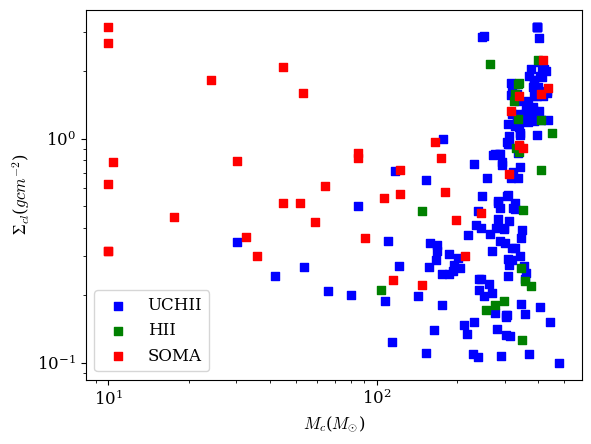

In [3]:
#mcore vs sigma
plt1 = plt.scatter(x=table_UCHII_verf['mcore'], y=table_UCHII_verf['sigma'], marker = 's', label='UCHII', color='blue')
plt2 = plt.scatter(x=table_HII['mcore'], y=table_HII['sigma'], marker = 's', label='HII', color='green')
plt3 = plt.scatter(x=SOMA_table['mcore'], y=SOMA_table['sigma'], marker = 's', label='SOMA', color='red')

#Set scale to log
plt.xscale('log')
plt.yscale('log')
#These weird looking phrases give the subcripts and special characters we want
plt.xlabel('$M_c$($M_{\odot}$)')
plt.ylabel("$\u03A3_{cl}$($gcm^{-2}$)")
plt.legend(handles=[plt1,plt2,plt3])
#plt.savefig('mcore vs sigma.png',dpi=300,bbox_inches='tight')
plt.show()

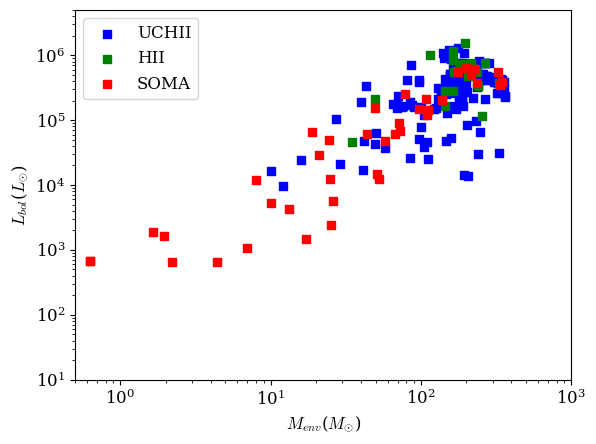

In [4]:
#Envelope mass vs bolometric luminosity
plt1 = plt.scatter(x=table_UCHII_verf['massenv'], y=table_UCHII_verf['lbol'], marker = 's', label='UCHII', color='blue')
plt2 = plt.scatter(x=table_HII['massenv'], y=table_HII['lbol'], marker = 's', label='HII', color='green')
plt3 = plt.scatter(x=SOMA_table['massenv'], y=SOMA_table['lbol'], marker = 's', label='SOMA', color='red')

plt.xscale('log')
plt.yscale('log')
#plt.title("H70")
#Make sure the "env" and "bol" are enclosed by brackets {} so the entire phrase is subscripted
plt.xlabel("$M_{env}$($M_{\odot}$)")
plt.ylabel("$L_{bol}$($L_{\odot}$)")
#Set the axes ranges just to make sure both plots have the same range along each axis
plt.xlim(5e-1,1e3)
plt.ylim(1e1,5e6)
plt.legend(handles=[plt1, plt2, plt3])
#plt.savefig('Envelope mass vs Lbol.png', dpi=300, bbox_inches='tight')
plt.show()

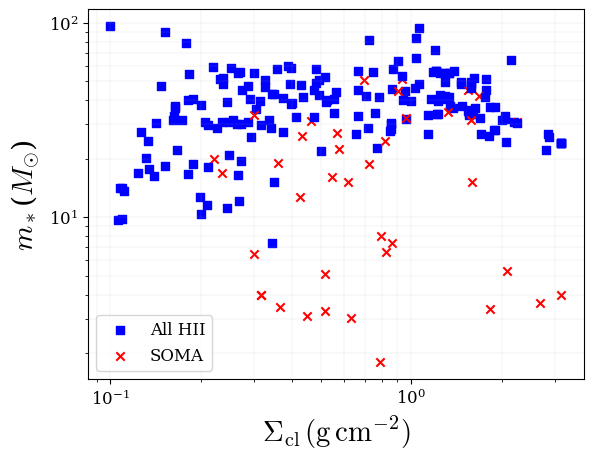

In [5]:
#Envelope mass vs bolometric luminosity
plt1 = plt.scatter(x=table_UCHII_verf['sigma'], y=table_UCHII_verf['mstar'], marker = 's', label='All HII', color='blue')
plt2 = plt.scatter(x=SOMA_table['sigma'], y=SOMA_table['mstar'], marker = 'x', label='SOMA', color='red')
plt3 = plt.scatter(x=table_HII['sigma'], y=table_HII['mstar'], marker = 's', color='blue')

plt.xscale('log')
plt.yscale('log')
#Make sure the "env" and "bol" are enclosed by brackets {} so the entire phrase is subscripted
plt.xlabel(r'$\Sigma_\mathrm{cl}\,(\mathrm{g\,cm^{-2}})$', fontsize='xx-large')
plt.ylabel("$m_*$($M_{\odot}$)", fontsize='xx-large')
#Set the axes ranges just to make sure both plots have the same range along each axis
plt.grid(True, which="both", lw=0.1)
plt.legend(handles=[plt1, plt2], prop={'size': 12}, loc='lower left')
#plt.savefig('mstar vs sigma line_UCHII.png',dpi=300,bbox_inches='tight')
plt.show()

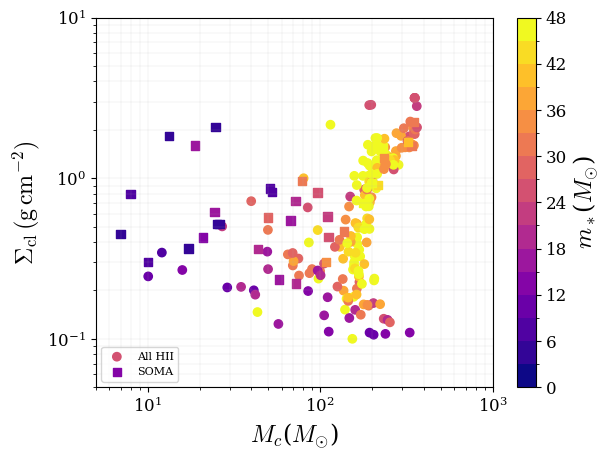

In [6]:
#mcore vs sigma, with mstar for each source also shown as a colorbar (as in SOMA IV paper)
plt.set_cmap('plasma') #choices are viridis, plasma, inferno, magma, cividis

#Set the colormap and extract all the colors from it
cmap = plt.cm.plasma
cmaplist = [cmap(i) for i in range(cmap.N)]

#Create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

#Define the bins (what intervals the different colors will show up as) and normalize
bounds = (0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

#Scatter the points on the plot, overlay the grid and colorbar, label the axes, set the log scale
s = plt.scatter(x=table_UCHII_verf['massenv'], y=table_UCHII_verf['sigma'], c=table_UCHII_verf['mstar'], norm=norm, marker = 'o', 
                label='All HII')
s1 = plt.scatter(x=SOMA_table['massenv'], y=SOMA_table['sigma'], c=SOMA_table['mstar'], norm=norm, marker = 's',
                label='SOMA')
s2 = plt.scatter(x=table_HII['massenv'], y=table_HII['sigma'], c=table_HII['mstar'], norm=norm, marker = 'o', 
                label='HII')

cb = plt.colorbar(s)
cb.set_label("$m_*$($M_{\odot}$)", fontsize='x-large')
plt.xlabel("$M_c$($M_{\odot}$)", fontsize='x-large')
plt.ylabel(r'$\Sigma_\mathrm{cl}\,(\mathrm{g\,cm^{-2}})$', fontsize='x-large')
plt.xscale('log')
plt.yscale('log')
plt.xlim(5e0,1e3)
plt.ylim(5e-2,1e1)
plt.legend(handles=[s, s1], loc='lower left', prop={'size': 8})
plt.grid(True, which="both", lw=0.1)
#plt.savefig('mcore vs sigma(mstar colorbar).png',dpi=300,bbox_inches='tight')
plt.show()

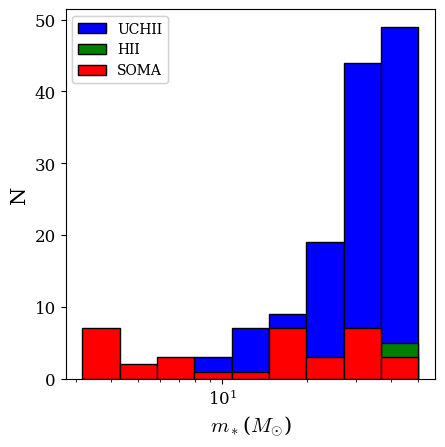

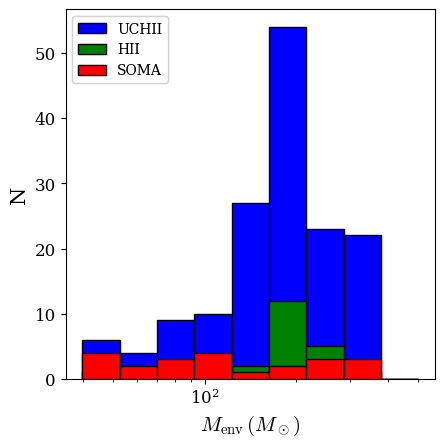

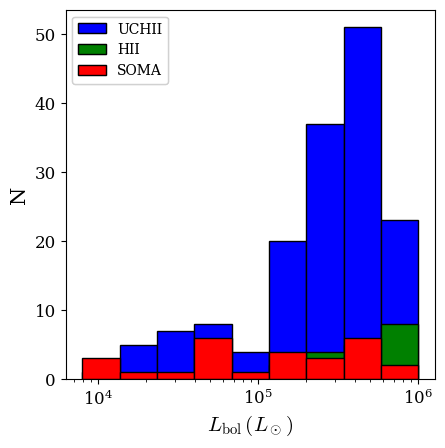

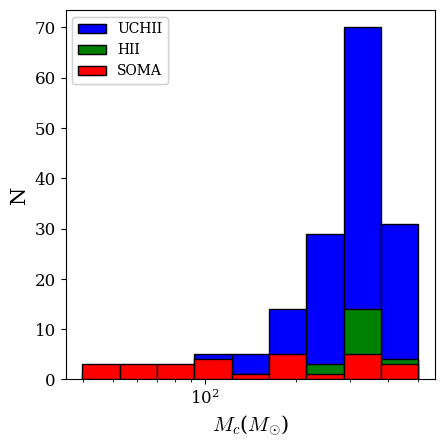

In [7]:
#Histogram for protostellar mass
nbins=np.linspace(0.5, 1.7, 10)
bins=10**nbins
fig = plt.figure()
ax = fig.add_subplot(111)
mstar_counts = ax.hist([table_UCHII_verf['mstar']], edgecolor='black', lw=1, bins=bins, stacked=True, color='blue', log=True, label = 'UCHII')
ax.hist([table_HII['mstar']], edgecolor='black', lw=1, bins=bins, stacked=True, color='green', log=True, label = 'HII')
ax.hist([SOMA_table['mstar']], edgecolor='black', lw=1, bins=bins, stacked=True, color='red', log=True, label = 'SOMA')
ax.set_xlabel("$m_*$($M_{\odot}$)", fontsize='15')
ax.set_ylabel('N', fontsize='15')
ax.set_xscale('log')
ax.set_yscale('linear')
ax.legend(fontsize=10,ncol=1,loc=2)
leg1 = ax.legend(fontsize=10,ncol=1,loc=2)
ax.add_artist(leg1)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
#plt.savefig('Histogram_mstar_UCHII.png',dpi=300,bbox_inches='tight')

#Histogram for envelope mass 
nbins=np.linspace(1.6,2.7,10)
bins=10**nbins
fig = plt.figure()
ax = fig.add_subplot(111)
mstar_counts = ax.hist([table_UCHII_verf['massenv']], edgecolor='black', lw=1, bins=bins, stacked=True, color='blue', log=True, label = 'UCHII')
ax.hist([table_HII['massenv']], edgecolor='black', lw=1, bins=bins, stacked=True, color='green', log=True, label = 'HII')
ax.hist([SOMA_table['massenv']], edgecolor='black', lw=1, bins=bins, stacked=True, color='red', log=True, label = 'SOMA')
ax.set_xlabel("$M_\mathrm{env}\,(M_\odot)$", fontsize='15')
ax.set_ylabel('N', fontsize='15')
ax.set_xscale('log')
ax.set_yscale('linear')
ax.legend(fontsize=10,ncol=1,loc=2)
leg1 = ax.legend(fontsize=10,ncol=1,loc=2)
ax.add_artist(leg1)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
#plt.savefig('Histogram_envolope mass_UCHII.png',dpi=300,bbox_inches='tight')

#Histogram for bolometric luminosity
nbins=np.linspace(3.9,6.0,10)
bins=10**nbins
fig = plt.figure()
ax = fig.add_subplot(111)
mstar_counts = ax.hist([table_UCHII_verf['lbol']], edgecolor='black', lw=1, bins=bins, stacked=True, color='blue', log=True, label = 'UCHII')
ax.hist([table_HII['lbol']], edgecolor='black', lw=1, bins=bins, stacked=True, color='green', log=True, label = 'HII')
ax.hist([SOMA_table['lbol']], edgecolor='black', lw=1, bins=bins, stacked=True, color='red', log=True, label = 'SOMA')
ax.set_xlabel("$L_\mathrm{bol}\,(L_\odot)$", fontsize='15')
ax.set_ylabel('N', fontsize='15')
ax.set_xscale('log')
ax.set_yscale('linear')
ax.legend(fontsize=10,ncol=1,loc=2)
leg1 = ax.legend(fontsize=10,ncol=1,loc=2)
ax.add_artist(leg1)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
#plt.savefig('Histogram_Lbol_UCHII.png',dpi=300,bbox_inches='tight')

#Histogram for mcore 
nbins=np.linspace(1.6,2.7,10)
bins=10**nbins
fig = plt.figure()
ax = fig.add_subplot(111)
mstar_counts = ax.hist([table_UCHII_verf['mcore']], edgecolor='black', lw=1, bins=bins, stacked=True, color='blue', log=True, label = 'UCHII')
ax.hist([table_HII['mcore']], edgecolor='black', lw=1, bins=bins, stacked=True, color='green', log=True, label = 'HII')
ax.hist([SOMA_table['mcore']], edgecolor='black', lw=1, bins=bins, stacked=True, color='red', log=True, label = 'SOMA')
ax.set_xlabel("$M_c$($M_{\odot}$)", fontsize='15')
ax.set_ylabel('N', fontsize='15')
ax.set_xscale('log')
ax.set_yscale('linear')
ax.legend(fontsize=10,ncol=1,loc=2)
leg1 = ax.legend(fontsize=10,ncol=1,loc=2)
ax.add_artist(leg1)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
#plt.savefig('Histogram_mcore_UCHII.png',dpi=300,bbox_inches='tight')

In [8]:
cd "/Data/prost_highmass/"

C:\Users\tiqui\OneDrive\CASSUM 2022\Notebooks\SEDs using sedcreator\SEDs\prost_highmass


In [9]:
ET_directories = glob.glob('mcore*.cont')

In [10]:
cd ../

C:\Users\tiqui\OneDrive\CASSUM 2022\Notebooks\SEDs using sedcreator


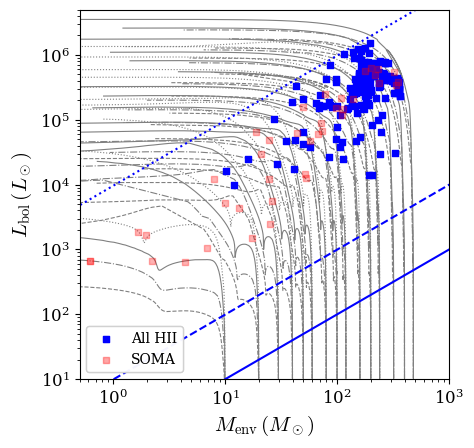

In [11]:
#Plot of envelope mass vs bolometric luminosity with the evolutionary trakcs included
fig = plt.figure()
ax = fig.add_subplot(111)
path_evol_tracks = '/Data/prost_highmass/'
for i in range(len(ET_directories)):
    nstep,ms,rs,lsurf,pct,tmax,lpre,time,exm,prost = np.loadtxt(path_evol_tracks+ET_directories[i]+'/history.dat',unpack=True)
    nstep,ms,mcoll,msdot,pw,epsilon,theta,fesc = np.loadtxt(path_evol_tracks+ET_directories[i]+'/acchist.dat',unpack=True)
    mc=float(ET_directories[i].split('.')[0][5:])
    gn=6.67e-8
    msun=1.999999999e+33
    yr=3.154e+7
    rsun=6.96e10
    lsun=3.845e33
    menv=(mc-mcoll)*np.cos(theta*np.pi/180.)
    lsbdy=lsurf+gn*msdot*msun/yr*ms/2./rs/rsun/lsun*msun
    lbol=lsbdy+gn*msdot*msun/yr*ms/2./rs/rsun/lsun*msun/2.
    
    #plotting the tracks
    if 'sigma0.1' in ET_directories[i]:
        ax.loglog(menv,lbol,'--',linewidth=0.8,color='grey')
    elif 'sigma0.316' in ET_directories[i]:
        ax.loglog(menv,lbol,'-.',linewidth=0.8,color='grey')
    elif 'sigma1.' in ET_directories[i]:
        ax.loglog(menv,lbol,'-',linewidth=0.8,color='grey')
    elif 'sigma3.16' in ET_directories[i]:
        ax.loglog(menv,lbol,':',linewidth=0.8,color='grey')
    else:
        pass
    
line = np.linspace(0,1e6)
ax.loglog(0,0,'--',color='grey')#, label='$\Sigma_\mathrm{cl}=0.1$')
ax.loglog(0,0,'-.',color='grey')#, label='$\Sigma_\mathrm{cl}=0.316$')
ax.loglog(0,0,'-',color='grey')#, label='$\Sigma_\mathrm{cl}=1.0$')
ax.loglog(0,0,':',color='grey')#, label='$\Sigma_\mathrm{cl}=3.16$')
          
#Plotting the lbol/menv (blue) lines
ax.plot(line,1e0*line,'b-')#,label='$L_\mathrm{bol}/M_\mathrm{env}=1\,L_\odot/M_\odot$')
ax.plot(line,1e1*line,'b--')#,label='$L_\mathrm{bol}/M_\mathrm{env}=10\,L_\odot/M_\odot$')
ax.plot(line,1e4*line,'b:')#,label='$L_\mathrm{bol}/M_\mathrm{env}=10^4\,L_\odot/M_\odot$')

ax.scatter(x=table_UCHII_verf['massenv'], y=table_UCHII_verf['lbol'], marker = 's', s=15, label='All HII', color='blue', zorder=5)
ax.scatter(x=table_HII['massenv'], y=table_HII['lbol'], marker = 's', s=15, color='blue', zorder=5)
ax.scatter(x=SOMA_table['massenv'], y=SOMA_table['lbol'], marker = 's',s=15, label='SOMA', color='red', alpha=0.3, zorder=5)
ax.legend(fontsize=10,ncol=1,loc=0)
leg1 = ax.legend(fontsize=10,ncol=1,loc=0)
ax.add_artist(leg1)
ax.set_xlabel('$M_\mathrm{env}\,(M_\odot)$', fontsize='15')
ax.set_ylabel('$L_\mathrm{bol}\,(L_\odot)$', fontsize='15')
ax.set_xlim(5e-1,1e3)
ax.set_ylim(1e1,5e6)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
#plt.savefig('Menv vs Lbol tracks-SOMA Methods.png',dpi=300,bbox_inches='tight')